In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('wines_SPA.csv')

In [3]:
df.shape

(7500, 11)

In [4]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [5]:
df.sample(15)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
2241,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0
6541,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
5490,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
2206,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Espana,Rias Baixas,16.78,Albarino,3.0,3.0
2229,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
3854,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
1707,Gallina de Piel,Manar dos Seixas,2019,4.3,38,Espana,Ribeiro,13.50,NaN,NaN,NaN
1025,Vinedos Hermanos Hernaiz,Las Cenizas Tempranillo,2018,4.4,43,Espana,Rioja Alta,19.95,Rioja Red,4.0,3.0
2142,Artadi,Valdegines,2016,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
4990,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [7]:
df['year']=df['year'].replace('N.V.', pd.NA)
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype(int)

In [8]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [9]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,2013.399333,4.254933,451.109067,60.095822,4.158427,2.946612
std,6.821921,0.118029,723.001856,150.356676,0.583352,0.248202
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2011.000000,4.200000,389.000000,18.900000,4.000000,3.000000
50%,2015.000000,4.200000,404.000000,28.530000,4.000000,3.000000
75%,2017.000000,4.200000,415.000000,51.350000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [37]:
df.duplicated().sum()

np.int64(0)

In [36]:
df=df.drop_duplicates()

In [12]:
df.loc[:,'acidity']=df.groupby('wine')['acidity'].transform(lambda x:x.fillna(x.median()))

In [13]:
df.loc[:,'body']=df.groupby('wine')['body'].transform(lambda x:x.fillna(x.median()))

In [14]:
df.loc[:,'acidity']=df['acidity'].fillna(df['acidity'].mean())

In [15]:
df.loc[:,'body']=df['body'].fillna(df['body'].mean())

In [16]:
df=df.dropna(subset=['year'])

In [17]:
df.loc[:,'type'] = df.groupby('wine')['type'].transform(lambda x:x.fillna(x.mode()))


In [18]:
df=df.dropna(subset=['type'])

In [19]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [20]:
df = df.drop(columns=['country'])

In [21]:
df['type'].nunique()

21

In [22]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [23]:
df.sample(5)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
710,Alion,Ribera del Duero,2001,4.4,681,Ribera del Duero,190.00000,11,5.000000,3.000000
1215,Condado de Haza,Alenza Ribera del Duero Gran Reserva,2006,4.3,675,Ribera del Duero,70.00000,11,5.000000,3.000000
1199,Imperial,Rioja Reserva,2017,4.3,799,Rioja,25.45000,12,4.000000,3.000000
1415,Zarate,Tras da Vina Albarino,2018,4.3,155,Rias Baixas,33.67000,0,4.266108,2.925092
18,Bodegas El Nido,El Nido,2018,4.8,217,Jumilla,195.62738,10,4.000000,3.000000


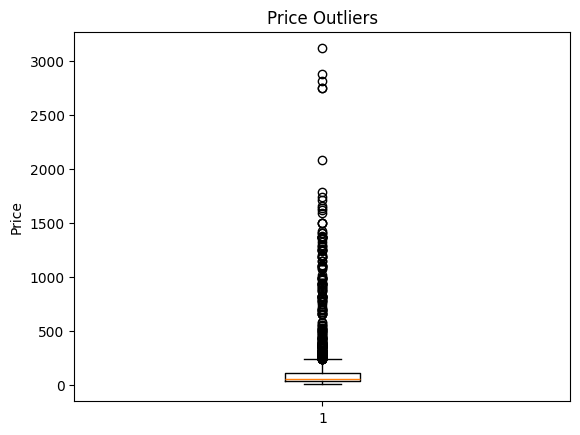

In [24]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [25]:
lower_percentile=0.1
upper_percentile=0.9
lower_bound=df['price'].quantile(lower_percentile)
upper_bound=df['price'].quantile(upper_percentile)

In [26]:
df['price']=np.where(df['price']>upper_bound,upper_bound,df['price'])
df['price']=np.where(df['price']<lower_bound,lower_bound,df['price'])

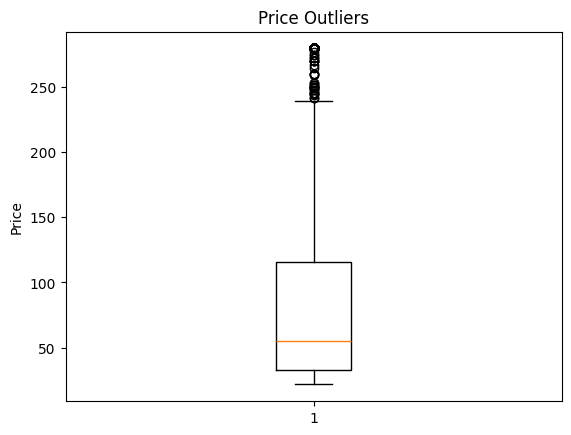

In [27]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [28]:
df.sample(15)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1835,Matarromera,Crianza,2016,4.2,4127,Ribera del Duero,21.60,11,5.0,3.0
365,Dominio de Pingus,Flor de Pingus,2014,4.5,2710,Ribera del Duero,125.00,11,5.0,3.0
1114,La Rioja Alta,Vina Ardanza Reserva,2009,4.3,10273,Rioja,24.38,12,4.0,3.0
137,Toro Albala,Don PX Pedro Ximenez,1955,4.7,50,Montilla-Moriles,250.00,8,5.0,1.0
493,Tinto Pesquera,Millenium Reserva,1996,4.5,106,Ribera del Duero,199.45,11,5.0,3.0
1733,R. Lopez de Heredia,Vina Tondonia Reserva,2014,4.3,35,Rioja,47.95,12,4.0,3.0
1235,Dominio de Cair,Tierras de Cair Reserva,2012,4.3,535,Ribera del Duero,38.30,11,5.0,3.0
1115,La Rioja Alta,Vina Ardanza Reserva,2012,4.3,9092,Rioja,21.60,12,4.0,3.0
1632,Clos Galena,Galena,2018,4.3,54,Priorato,21.60,9,4.0,3.0
127,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2005,4.7,67,Priorato,279.68,9,4.0,3.0


In [29]:
df.head(25)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,279.68000,19,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,279.68000,18,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,279.68000,11,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,279.68000,11,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,279.68000,11,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Ribera del Duero,279.68000,11,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Ribera del Duero,279.68000,11,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Ribera del Duero,279.68000,11,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Ribera del Duero,279.68000,11,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Ribera del Duero,279.68000,11,5.0,3.0


In [30]:
pip install ydata-profiling


In [38]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")
profile.to_notebook_iframe()

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 18.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]